# Kickstarter EDA
## Load data

In [2]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_pickle("master")

In [15]:
print(df.nunique())
print(df.shape)

location_country              199
location_state               1161
location_localized_name     12403
cbsa_name                     878
top100                          2
backers_count                3101
goal                         4958
pledged                     42213
creator_name               148017
gender                          6
category_slug                 168
category_name                 158
launched_at                177647
deadline                   165981
state_changed_at           168382
state                           5
life                        51915
duration                    61396
prep                       167026
dtype: int64
(222522, 19)


In [59]:
df.isnull().sum()

location_country            1350
location_state              1395
location_localized_name     1350
cbsa_name                  59821
top100                     59821
backers_count                  0
goal                           0
pledged                        0
creator_name                   0
gender                         0
category_slug                  0
category_name                  0
launched_at                    0
deadline                       0
state_changed_at               0
state                          0
life                           0
duration                       0
prep                           0
dtype: int64

In [4]:
df["launched_year"] = df['launched_at'].dt.year

In [61]:
df[df['location_state']=='CA'].groupby(['location_state','launched_year'])['duration'].count()

location_state  launched_year
CA              2009              150
                2010             1589
                2011             3257
                2012             4139
                2013             3261
                2014             4735
                2015             4948
                2016             3218
                2017             2527
                2018              766
Name: duration, dtype: int64

In [62]:
np.random.seed(0)

## Scaling and Randomization

In [63]:
from scipy import stats


In [64]:
df['pledged_log'] = np.log(df['pledged']+1)
df['goal_log'] = np.log(df['goal']+1)

## Visualize

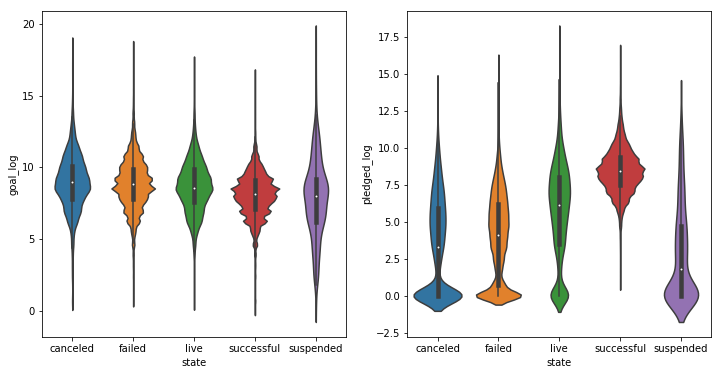

In [65]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.violinplot(x='state', y="goal_log", data = df)

plt.subplot(122)
sns.violinplot(x='state', y="pledged_log", data = df)

plt.show()

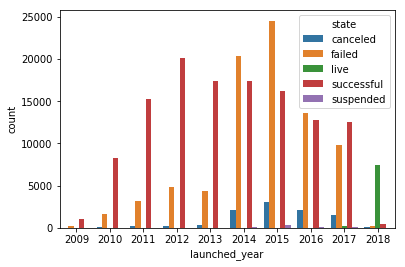

In [66]:
sns.countplot(x='launched_year', data = df, hue='state')
plt.show()

In [18]:
MSA_year= ['cbsa_name', 'category_broad']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[df['top100']==1][MSA_year[0]], df[df['top100']==1][MSA_year[1]]).style.background_gradient(cmap = cm)

category_broad,art,comics,crafts,dance,design,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
cbsa_name,,,,,,,,,,,,,,,
"Akron, OH",31,14,19,2,13,8,21,45,20,4,35,1,26,31,5
"Albany-Schenectady-Troy, NY",37,49,20,14,26,17,95,49,68,22,133,31,59,57,12
"Albuquerque, NM",60,18,4,18,9,10,63,25,44,20,39,15,51,37,15
"Allentown-Bethlehem-Easton, PA-NJ",37,23,21,14,16,13,63,61,64,25,75,13,47,65,18
"Atlanta-Sandy Springs-Roswell, GA",254,116,105,40,101,158,409,204,189,76,513,70,279,265,70
"Augusta-Richmond County, GA-SC",1,2,12,1,3,0,7,7,0,5,8,0,6,3,0
"Austin-Round Rock, TX",265,79,43,55,84,84,359,165,196,51,544,90,250,234,64
"Bakersfield, CA",13,8,8,0,5,4,14,16,11,2,21,3,13,14,4
"Baltimore-Columbia-Towson, MD",120,100,41,29,54,49,123,108,78,37,195,34,165,114,34


In [ ]:
## TODO filter data
# games + tech + design
# US
# top 100 MSA
# successful